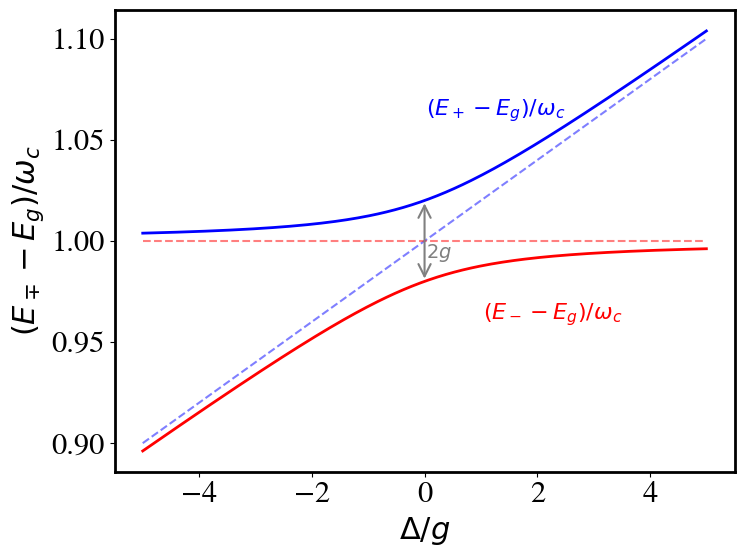

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*

#STIXGeneral

font = {'family' : 'STIXGeneral',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

# Define parameters
omega_q = 5.0  # Transmon frequency (GHz)
omega_r_range = np.linspace(4.5, 5.5, 200)  # Resonator frequency sweeping (GHz)
g = 0.1  # Coupling strength (GHz)

# Compute energy levels (avoided crossing formula) with respect E_g
E_plus = (omega_q + omega_r_range) / 2 + 0.5 * np.sqrt((omega_q - omega_r_range)**2 + 4 * g**2) 
E_minus = (omega_q + omega_r_range) / 2 - 0.5 * np.sqrt((omega_q - omega_r_range)**2 + 4 * g**2) 

# Compute energy levels (avoided crossing formula) with respect E_g
detuning = np.linspace(-0.5, 0.5, 200) 
omega_r = 5.0 # GHz
E_plus_Eg = (detuning) / 2 + 0.5 * np.sqrt((detuning)**2 + 4 * g**2) + omega_r
E_minus_Eg = (detuning) / 2 - 0.5 * np.sqrt((detuning)**2 + 4 * g**2) + omega_r

# No hybridization g = 0
E_plus_Eg_Nog = (detuning) / 2 + 0.5 * detuning + omega_r
E_minus_Eg_Nog = (detuning) / 2 - 0.5 * detuning + omega_r

# Compute detuning
detuning2 = omega_q - omega_r_range

"""# Plot
plt.figure(figsize=(7,5))
plt.plot(detuning2, E_plus - omega_r_range, label=r"$E_+$", color="blue")
plt.plot(detuning2, E_minus - omega_r_range, label=r"$E_-$", color="red")
plt.xlabel("Detuning (GHz)")
plt.ylabel("Energy Difference from Ground State (GHz)")
plt.title("Avoided Crossing in a Two-Level Transmon System")
plt.axvline(0, color="gray", linestyle="--", alpha=0.6)  # Highlight zero detuning
plt.legend()
plt.grid(True)
plt.show()"""

# Plot
plt.figure(figsize=(8,6))
plt.plot(detuning/g, E_plus_Eg/omega_r, label=r"$E_+$", color="blue", linewidth=2)
plt.plot(detuning/g, E_minus_Eg/omega_r, label=r"$E_-$", color="red", linewidth=2)
plt.plot(detuning/g, E_plus_Eg_Nog/omega_r, label=r"$E_+$", color="blue", linestyle = '--', alpha =0.5)
plt.plot(detuning/g, E_minus_Eg_Nog/omega_r, label=r"$E_-$", color="red",  linestyle = '--', alpha =0.5)
plt.xlabel("$\Delta/g$")
plt.ylabel("$(E_\mp - E_g)/\omega_c$")
#plt.title("Avoided Crossing")

# Add text labels directly on curves
plt.text(detuning[-100]/g, E_plus_Eg[-50]/omega_r, r"$(E_+ - E_g)/\omega_c$", fontsize=16, color="blue", verticalalignment='bottom')
plt.text(detuning[-80]/g, 0.97, r"$(E_- - E_g)/\omega_c$", fontsize=16, color="red", verticalalignment='top')

# Draw double-headed arrow at detuning = 0
mid_x = 0  # Detuning = 0
mid_y_top = E_plus[np.argmin(abs(detuning))] - omega_r_range[np.argmin(abs(detuning))]
mid_y_bottom = E_minus[np.argmin(abs(detuning))] - omega_r_range[np.argmin(abs(detuning))]

plt.annotate("", xy=(mid_x, 1.02), xytext=(mid_x, 0.98),
             arrowprops=dict(arrowstyle="<->", color="grey", linewidth=1.5))
plt.text(mid_x + 0.02, 0.994, r"$2g$", fontsize=14, color="grey", verticalalignment='center')

# Make all spines (borders) thicker
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Change thickness as needed


#plt.axvline(0, color="gray", linestyle="--", alpha=0.6)  # Highlight zero detuning
#plt.legend()
#plt.grid(True)
plt.show()
